## Data frames

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data Pre-processing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [8]:
X = df.drop('Class', axis=1)
y = df.Class

In [9]:
X = scalar.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Modeling

In [11]:
from sklearn.svm import SVC

In [12]:
model_svc = SVC()

In [13]:
model_svc.fit(X_train, y_train)

SVC()

In [14]:
model_svc.score(X_train,y_train)

0.9996752178015756

In [15]:
model_svc.score(X_test,y_test)

0.999385555282469

In [16]:
y_predict = model_svc.predict(X_test)

## Implementing Report

In [17]:
from sklearn.metrics import classification_report , confusion_matrix

In [18]:
import numpy as np

In [19]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,55,32
is Normal,3,56872


In [20]:
import seaborn as sns

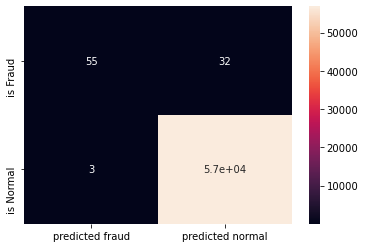

In [21]:
sns.heatmap(confusion, annot=True)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962

